## 통계청 서울특별시 아파트 거래 현황
* 부동산거래현황:행정구역별 아파트거래현황 : https://kosis.kr/statHtml/statHtml.do?orgId=408&tblId=DT_408_2006_S0049&conn_path=I2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import koreanize_matplotlib

## csv 파일로드

In [2]:
df = pd.read_csv("data/kosis-apt-2006-202307.csv", encoding="cp949", dtype={"시점":"string"})
df.shape

(3720, 4)

In [3]:
df.head(3)

,시점,행정구역별(1),호수 (호수),면적 (천㎡)
0,2006.01,전국,61675,5872
1,2006.01,서울특별시,7704,686
2,2006.01,부산광역시,4592,410


In [4]:
df.tail(3)

,시점,행정구역별(1),호수 (호수),면적 (천㎡)
3717,2023.07,경상북도,2945,220
3718,2023.07,경상남도,4211,310
3719,2023.07,제주특별자치도,239,17


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시점        3720 non-null   string
 1   행정구역별(1)  3720 non-null   object
 2   호수 (호수)   3720 non-null   int64 
 3   면적 (천㎡)   3720 non-null   int64 
dtypes: int64(2), object(1), string(1)
memory usage: 116.4+ KB


In [6]:
df["연도"] = df["시점"].apply(lambda x : int(str(x)[:4]))
df["월"] = df["시점"].apply(lambda x : int(str(x)[5:]))
df

,시점,행정구역별(1),호수 (호수),면적 (천㎡),연도,월
0,2006.01,전국,61675,5872,2006,1
1,2006.01,서울특별시,7704,686,2006,1
2,2006.01,부산광역시,4592,410,2006,1
3,2006.01,대구광역시,3684,292,2006,1
4,2006.01,인천광역시,2143,149,2006,1
...,...,...,...,...,...,...
3715,2023.07,전라북도,2087,157,2023,7
3716,2023.07,전라남도,2168,164,2023,7
3717,2023.07,경상북도,2945,220,2023,7
3718,2023.07,경상남도,4211,310,2023,7


In [7]:
df.columns = ["시점", "행정구역", "호수", "면적", "연도", "월"]
df.head(2)

,시점,행정구역,호수,면적,연도,월
0,2006.01,전국,61675,5872,2006,1
1,2006.01,서울특별시,7704,686,2006,1


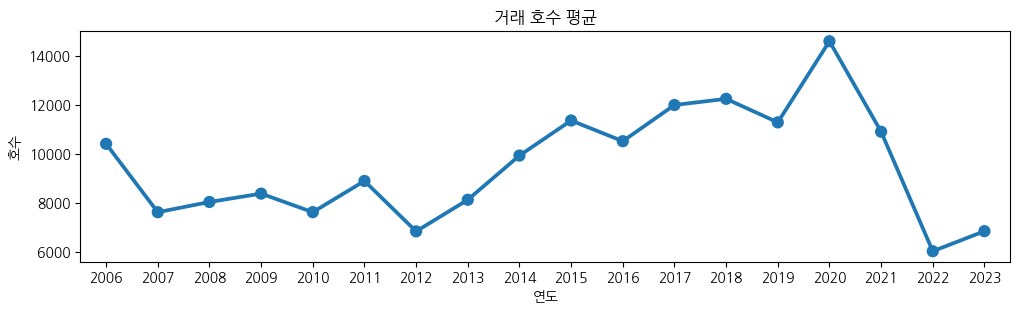

In [8]:
plt.figure(figsize=(12, 3))
sns.pointplot(data=df, x="연도", y="호수", errorbar=None, estimator="mean")
plt.title("거래 호수 평균");

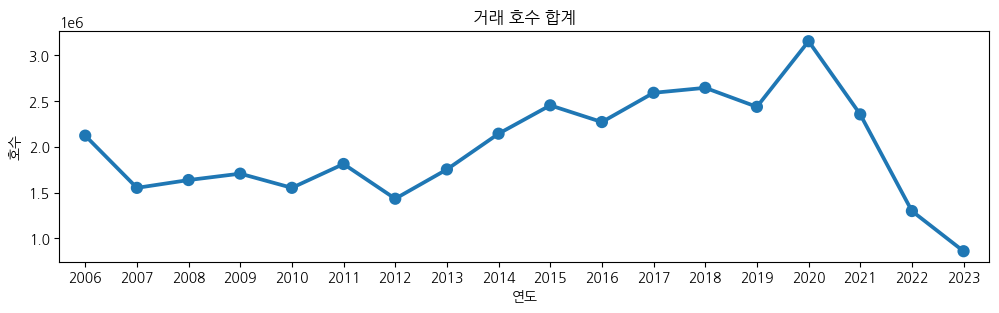

In [9]:
plt.figure(figsize=(12, 3))
sns.pointplot(data=df, x="연도", y="호수", errorbar=None, estimator="sum") 
plt.title("거래 호수 합계");